In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("HR Employee Attrition.csv")

In [3]:
pd.pandas.set_option("display.max_columns",None)

In [4]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
dataset.shape

(1470, 35)

# Pre-Processing 

In [6]:
#Step-1: Identifying Null values

In [7]:
Null_Values = [feature for feature in dataset.columns if dataset[feature].isnull().sum()]

for feature in Null_Values:
    if feature >=0:
        print(feature,np.round(dataset[feature].isnull().sum().mean,2),"% Missing Values")
    else:
        print("No Null data")

In [8]:
# How to use else statement in scenarios like above

In [9]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#No Null data

In [11]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [13]:
dataset = dataset.drop(["EmployeeCount",'EmployeeNumber'],axis = 1)

In [14]:
dataset = dataset.drop(["Over18",'StandardHours'],axis = 1)

In [15]:
dataset.shape

(1470, 31)

# Numerical Features

In [16]:
Numerical_feature = [feature for feature in dataset.columns if dataset[feature].dtype!= "O"]

print("Number of Numerical Features:",len(Numerical_feature))

Number of Numerical Features: 23


# Categorical Features

In [17]:
Categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]

print("Number of Categorical Features:",len(Categorical_feature))

Number of Categorical Features: 8


# Time Features

In [18]:
year_feature = [feature for feature in Numerical_feature if "Yr" in feature or "Year" in feature]

print(year_feature)

['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [19]:
Categorical_feature

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [20]:
discrete_feature = [feature for feature in Numerical_feature if (len(dataset[feature].unique())<10)]

print("Number of unique features are : {}".format(len(discrete_feature)))

Number of unique features are : 10


In [21]:
discrete_feature

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [22]:
continuous_feature = [feature for feature in Numerical_feature if feature not in discrete_feature ]
print("No of continuous feature are : {}".format(len(continuous_feature)))

No of continuous feature are : 13


In [23]:
dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [24]:
dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsAtCompany'>

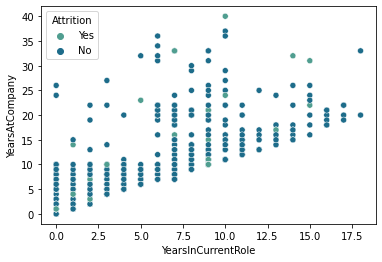

In [25]:
sns.scatterplot(y = 'YearsAtCompany', x = "YearsInCurrentRole", data = dataset,hue = "Attrition" , palette = "crest")

<AxesSubplot:xlabel='Gender', ylabel='count'>

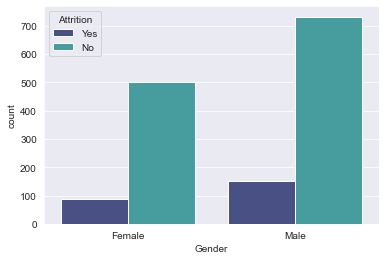

In [26]:
sns.set_style("darkgrid")
sns.countplot(x= "Gender", data = dataset, hue = "Attrition", palette = "mako")

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

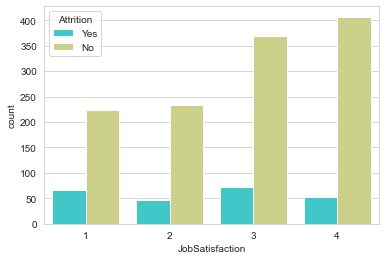

In [27]:
sns.set_style("whitegrid")
sns.countplot(x= "JobSatisfaction", data = dataset, hue = "Attrition",palette = "rainbow")

<AxesSubplot:xlabel='Department', ylabel='count'>

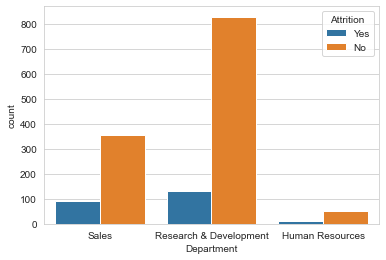

In [28]:
sns.countplot(x = "Department", hue = "Attrition", data = dataset)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

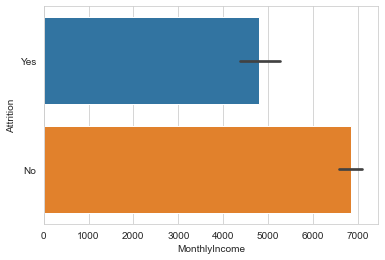

In [29]:
sns.barplot(x = "MonthlyIncome", y = "Attrition", data = dataset)

<AxesSubplot:xlabel='EducationField', ylabel='Department'>

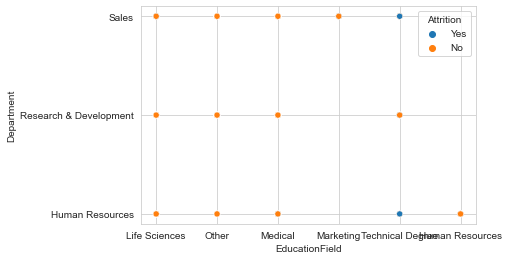

In [30]:
sns.scatterplot(x = "EducationField", y = "Department", data = dataset, hue = "Attrition")

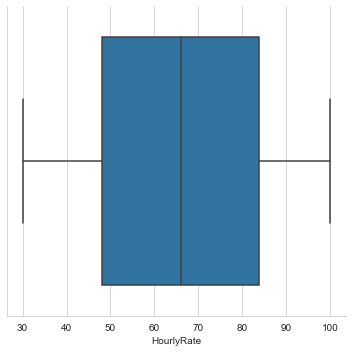

In [31]:
sns.catplot(x = "HourlyRate", kind = "box", data = dataset)

In [32]:
continuous_feature

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

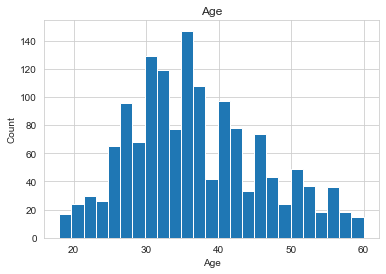

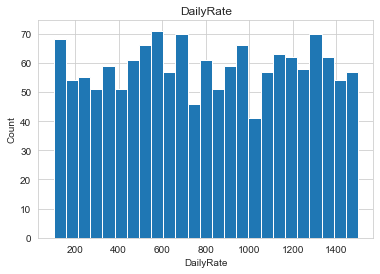

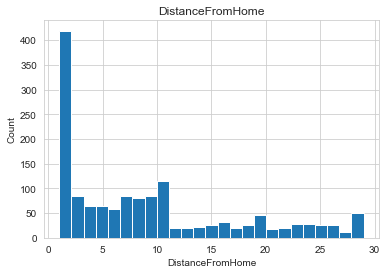

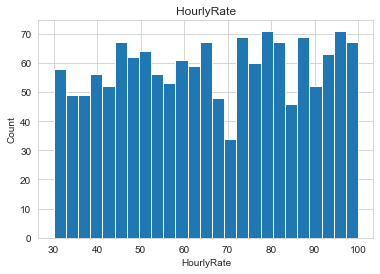

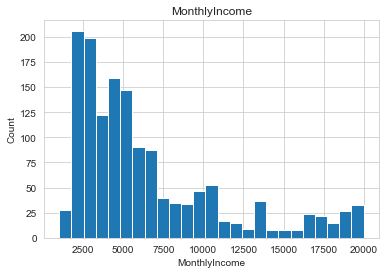

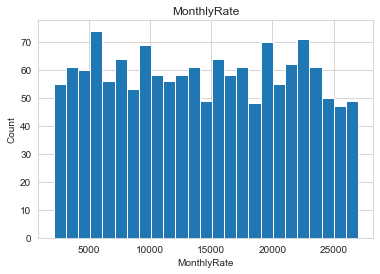

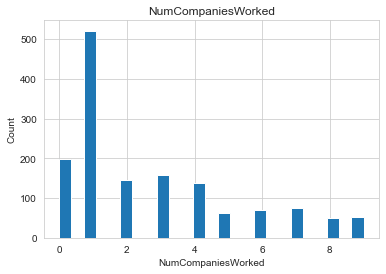

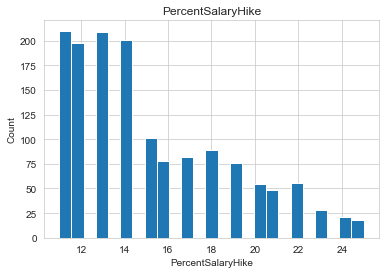

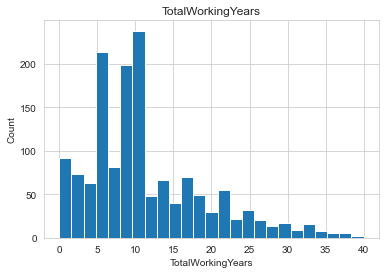

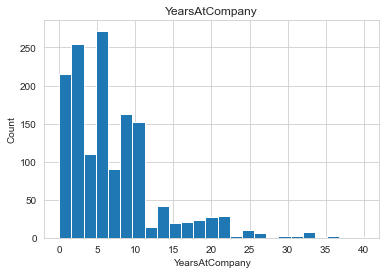

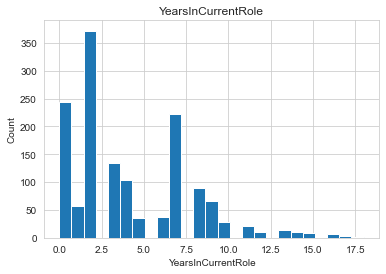

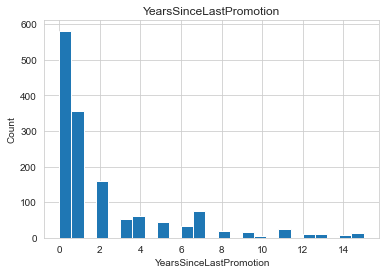

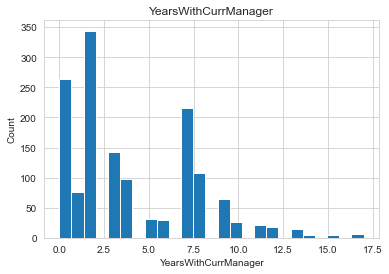

In [33]:
for feature in continuous_feature:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [33]:
outliers = []
def outlier(dataset):
    threshold = 3
    mean = np.mean(dataset)
    std = np.std(dataset)
    
    for i in dataset:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
        return outliers

NameError: name 'Numerical_Features' is not defined

In [34]:
outliers

[]

In [35]:
outliers = []
def outlier(Numerical_feature):
    threshold = 3
    mean = np.mean(Numerical_feature)
    std = np.std(Numerical_feature)
    
    for i in Numerical_feature:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
        return outliers

In [36]:
outliers

[]

In [36]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

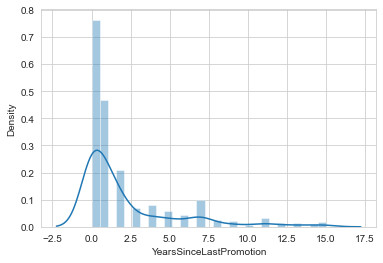

In [37]:
sns.distplot(dataset["YearsSinceLastPromotion"])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='YearsWithCurrManager'>

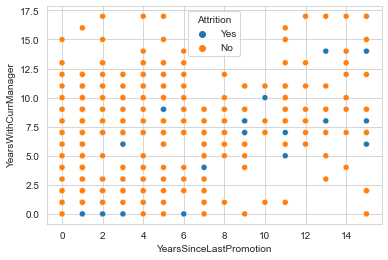

In [38]:
sns.scatterplot(x = "YearsSinceLastPromotion", y = "YearsWithCurrManager", data = dataset, hue = "Attrition")

In [39]:
continuous_feature

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

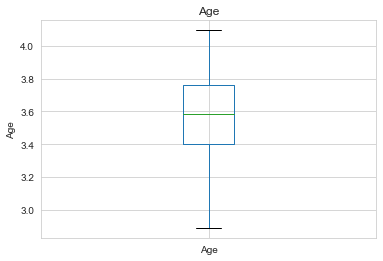

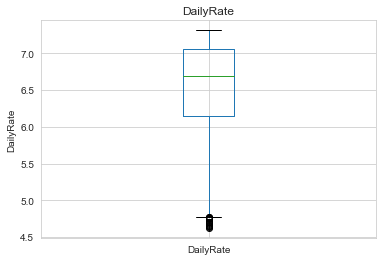

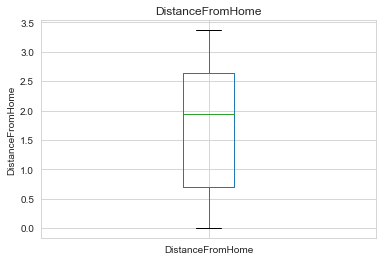

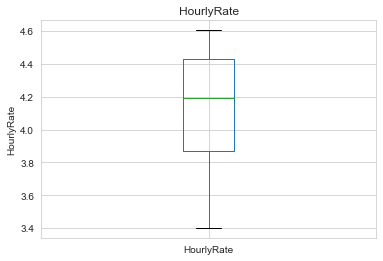

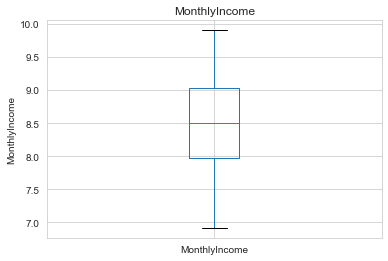

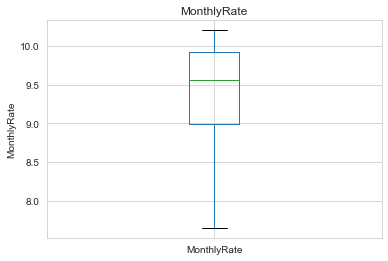

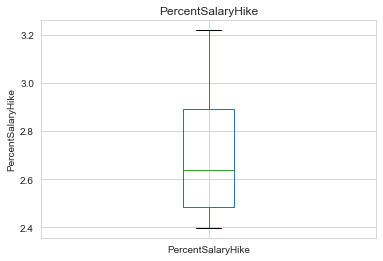

In [40]:
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    

In [41]:
#Applying Log Normal Distribution in Skewed features. Cond: They should not have 0, if 0 then as we know it should be skipped.

In [42]:
num_features = ["DailyRate"]
for feature in num_features:
    dataset[feature] = np.log(dataset[feature])

In [43]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,7.004882,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,5.631212,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,7.224753,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,7.238497,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,6.381816,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [44]:
# Step-2 Encoding

In [45]:
dataset['BusinessTravel'] = dataset["BusinessTravel"].astype("category")
dataset['BusinessTravel'] = dataset["BusinessTravel"].cat.codes
dataset["BusinessTravel"].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

In [46]:
dataset['Department'] = dataset["Department"].astype("category")
dataset['Department'] = dataset["Department"].cat.codes
dataset["Department"].value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

In [47]:
dataset["EducationField"] = dataset["EducationField"].astype("category")
dataset["EducationField"] = dataset["EducationField"].cat.codes
dataset["EducationField"].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

In [48]:
dataset["Gender"] = dataset["Gender"].astype("category")
dataset["Gender"] = dataset["Gender"].cat.codes
dataset["Gender"].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [49]:
dataset["JobRole"] = dataset["JobRole"].astype("category")
dataset["JobRole"] = dataset["JobRole"].cat.codes
dataset["JobRole"].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

In [50]:
dataset["MaritalStatus"] = dataset["MaritalStatus"].astype("category")
dataset["MaritalStatus"] = dataset["MaritalStatus"].cat.codes
dataset["MaritalStatus"].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [51]:
dataset["OverTime"] = dataset["OverTime"].astype("category")
dataset["OverTime"] = dataset["OverTime"].cat.codes
dataset["OverTime"].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [52]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,7.004882,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,No,1,5.631212,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2,7.224753,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,No,1,7.238497,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,No,2,6.381816,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [53]:
dataset["Attrition"] = dataset["Attrition"].astype("category")
dataset["Attrition"] = dataset["Attrition"].cat.codes
dataset["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [54]:
#Corelation

In [55]:
dataset.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.000804,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.049561,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.008978,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.000804,-0.049561,-0.008978,1.000000,0.012303,-0.014951,-0.017494,0.034744,0.018950,0.000997,0.029014,0.031838,0.002488,-0.000100,0.041904,-0.073347,0.007440,-0.028172,0.041985,0.009227,0.026133,0.002452,0.012191,0.049660,0.010456,-0.002628,-0.041801,-0.034723,0.012237,-0.034490,-0.028827
Department,-0.031882,0.063991,-0.009044,0.012303,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.014951,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.017494,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.034744,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018950,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,0.000997,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [56]:
#Imbalanced Dataset

In [57]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,7.004882,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,5.631212,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,7.224753,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,7.238497,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,6.381816,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [58]:
dataset["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [59]:
x = dataset.drop(["Attrition"],axis =1)
y = dataset["Attrition"]

In [60]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [61]:
print(dataset['Attrition'].value_counts())

print("#######"*5)

print(y_over.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64
###################################
1    1233
0    1233
Name: Attrition, dtype: int64


In [62]:
x = x_over
y = y_over

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = .7, random_state = 101)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1726, 30)
(740, 30)
(1726,)
(740,)


In [65]:
#Build Logit Regression

In [66]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [67]:
#Predict the Model

In [68]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [69]:
#Evaluate the Model

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [71]:
print(confusion_matrix(y_train, y_pred_train))
print("########"*25)
print(confusion_matrix(y_test, y_pred_test))

[[549 304]
 [244 629]]
########################################################################################################################################################################################################
[[242 138]
 [114 246]]


In [72]:
print(classification_report(y_train, y_pred_train))
print("#############"*25)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67       853
           1       0.67      0.72      0.70       873

    accuracy                           0.68      1726
   macro avg       0.68      0.68      0.68      1726
weighted avg       0.68      0.68      0.68      1726

#####################################################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       380
           1       0.64      0.68      0.66       360

    accuracy                           0.66       740
   macro avg       0.66      0.66      0.66       740
weighted avg       0.66      0.66      0.66       740



In [73]:
#Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [75]:
y_pred_dtree_train = dtree.predict(x_train)
y_pred_dtree_test = dtree.predict(x_test)

In [76]:
print(confusion_matrix(y_train, y_pred_dtree_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_dtree_test))

print(classification_report(y_train, y_pred_dtree_train))
print("#############"*5)
print(classification_report(y_test, y_pred_dtree_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_dtree_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_dtree_test))

[[853   0]
 [  0 873]]
#################################################################
[[313  67]
 [  1 359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

#################################################################
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       380
           1       0.84      1.00      0.91       360

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9081081081081082


In [77]:
from sklearn import tree

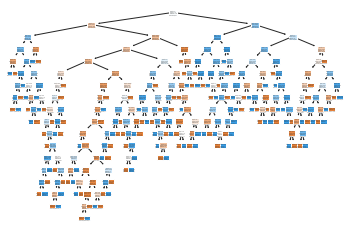

In [78]:
tree.plot_tree(dtree, filled=True)
plt.show()

In [79]:
#Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_reg.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [81]:
y_pred_train_rf = rf_reg.predict(x_train)
y_pred_test_rf = rf_reg.predict(x_test)

In [82]:
print(accuracy_score(y_train, y_pred_train_rf))
print("###############"*10)
print(accuracy_score(y_test, y_pred_test_rf))

1.0
######################################################################################################################################################
0.9756756756756757


In [83]:
x

array([0.86486486, 0.87837838, 0.90540541, 0.87837838, 0.86486486,
       0.81081081, 0.94594595, 0.7972973 , 0.95945946, 0.87837838])

In [84]:
#XG Boost

In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
#Learning: XGBoost Takes input in Binary

In [87]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [88]:
print(confusion_matrix(y_train, y_pred_xgb_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_xgb_test))

print(classification_report(y_train, y_pred_xgb_train))
print("#############"*5)
print(classification_report(y_test, y_pred_xgb_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_xgb_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_xgb_test))

[[853   0]
 [  0 873]]
#################################################################
[[347  33]
 [  1 359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

#################################################################
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       380
           1       0.92      1.00      0.95       360

    accuracy                           0.95       740
   macro avg       0.96      0.96      0.95       740
weighted avg       0.96      0.95      0.95       740

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9540540540540541


In [89]:
# ROC and AUC

In [90]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_xgb_test)
logistic_roc_auc

0.9551900584795321

In [91]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.08684211, 1.        ])

array([0.        , 0.99722222, 1.        ])

array([2, 1, 0])

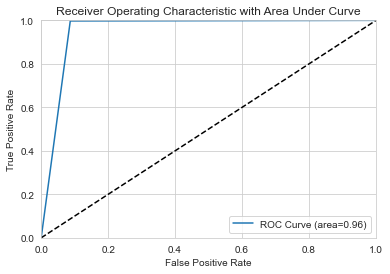

In [92]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [93]:
#Precision and Recall came best in XG Boost so will stay with this model

# With Standardized Value

In [94]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x1 = Scaler.fit_transform(x)

In [95]:
print(x.shape)
print(y.shape)
print(x1.shape)

(2466, 30)
(2466,)
(2466, 30)


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,train_size = .70, random_state = 101)

In [98]:
print(x1_train.shape)
print(y_train.shape)

(1726, 30)
(1726,)


# LR

In [99]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x1_train, y_train)

LogisticRegression()

In [100]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x1_train,y_train)

LogisticRegression()

In [101]:
y_pred_train = logit_model.predict(x1_train)
y_pred_test = logit_model.predict(x1_test)

In [102]:
print(confusion_matrix(y_train, y_pred_train))
print("########"*25)
print(confusion_matrix(y_test, y_pred_test))

[[650 203]
 [174 699]]
########################################################################################################################################################################################################
[[280 100]
 [ 96 264]]


In [103]:
print(classification_report(y_train, y_pred_train))
print("#############"*25)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       853
           1       0.77      0.80      0.79       873

    accuracy                           0.78      1726
   macro avg       0.78      0.78      0.78      1726
weighted avg       0.78      0.78      0.78      1726

#####################################################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       380
           1       0.73      0.73      0.73       360

    accuracy                           0.74       740
   macro avg       0.73      0.74      0.74       740
weighted avg       0.74      0.74      0.74       740



# DT

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(x1_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [105]:
y_pred_dtree_train = dtree.predict(x1_train)
y_pred_dtree_test = dtree.predict(x1_test)

In [106]:
print(confusion_matrix(y_train, y_pred_dtree_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_dtree_test))

print(classification_report(y_train, y_pred_dtree_train))
print("#############"*5)
print(classification_report(y_test, y_pred_dtree_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_dtree_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_dtree_test))

[[853   0]
 [  0 873]]
#################################################################
[[310  70]
 [  1 359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

#################################################################
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       380
           1       0.84      1.00      0.91       360

    accuracy                           0.90       740
   macro avg       0.92      0.91      0.90       740
weighted avg       0.92      0.90      0.90       740

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.904054054054054


# RF

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_reg.fit(x1_train, y_train)

RandomForestClassifier(criterion='entropy')

In [108]:
y_pred_train_rf = rf_reg.predict(x1_train)
y_pred_test_rf = rf_reg.predict(x1_test)

In [109]:
print(accuracy_score(y_train, y_pred_train_rf))
print("###############"*10)
print(accuracy_score(y_test, y_pred_test_rf))

1.0
######################################################################################################################################################
0.9689189189189189


# XGBoost

In [110]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x1_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [111]:
y_pred_xgb_train = xgb.predict(x1_train)
y_pred_xgb_test = xgb.predict(x1_test)

In [112]:
print(confusion_matrix(y_train, y_pred_xgb_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_xgb_test))

print(classification_report(y_train, y_pred_xgb_train))
print("#############"*5)
print(classification_report(y_test, y_pred_xgb_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_xgb_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_xgb_test))

[[853   0]
 [  0 873]]
#################################################################
[[347  33]
 [  1 359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

#################################################################
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       380
           1       0.92      1.00      0.95       360

    accuracy                           0.95       740
   macro avg       0.96      0.96      0.95       740
weighted avg       0.96      0.95      0.95       740

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9540540540540541


In [113]:
#Using Feature Selection

In [114]:
from sklearn.linear_model import Lasso
import statsmodels.api as sma

In [115]:
from sklearn.feature_selection import SelectFromModel

In [116]:
xz = dataset.drop(["Attrition"],axis=1)

In [117]:
yz = dataset["Attrition"]

In [118]:
feature_selection = SelectFromModel(Lasso(alpha=0.1,random_state=101))

In [119]:
feature_selection.fit(xz,yz)

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=101))

In [120]:
feature_selection.get_support()

array([ True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True])

In [121]:
selected_features= xz.columns[(feature_selection.get_support())]

#Print Details

print("Total Features:{}".format(xz.shape[1]))
print("Selected Features:{}".format(len(selected_features)))

Total Features:30
Selected Features:4


In [122]:
dataset[selected_features]

,Age,DistanceFromHome,YearsInCurrentRole,YearsWithCurrManager
0,41,1,4,5
1,49,8,7,7
2,37,2,0,0
3,33,3,7,0
4,27,2,2,2
...,...,...,...,...
1465,36,23,2,3
1466,39,6,7,7
1467,27,4,2,3
1468,49,2,6,8


In [123]:
#####

In [124]:
correlation = dataset.corr()["Attrition"].abs().sort_values(ascending = False)

In [125]:
correlation

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.049561
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
P

In [126]:
significant_features = correlation[correlation>.15].index.to_list()[1:]
significant_features

['OverTime',
 'TotalWorkingYears',
 'JobLevel',
 'MaritalStatus',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'Age',
 'YearsWithCurrManager']

In [127]:
#PCA

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
pca.fit(x_scaled)

PCA()

In [130]:
print("Variances Percentages:")
print(pca.explained_variance_ratio_*100)
print()

Variances Percentages:
[16.80215027  6.42262329  6.17964798  5.38283976  5.08875079  4.05535899
  4.02327422  3.83547302  3.56647631  3.52955692  3.48307638  3.36503755
  3.33681015  3.22474084  3.14920916  3.05803658  2.96112165  2.85701887
  2.68619778  2.64828322  2.37302471  1.70389217  1.52928113  1.06560751
  0.88645783  0.80373969  0.72495712  0.6831617   0.41602546  0.15816896]



In [131]:
print("Cumulative Variance Percentage")
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative Variance Percentage
[ 16.80215027  23.22477356  29.40442154  34.78726131  39.87601209
  43.93137108  47.9546453   51.79011832  55.35659463  58.88615155
  62.36922793  65.73426548  69.07107563  72.29581647  75.44502563
  78.50306221  81.46418385  84.32120272  87.0074005   89.65568373
  92.02870843  93.73260061  95.26188174  96.32748925  97.21394708
  98.01768676  98.74264389  99.42580558  99.84183104 100.        ]


In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components= .90)
pca.fit(x_scaled)

PCA(n_components=0.9)

In [133]:
print(pca.explained_variance_ratio_*100)
print("Variable responsible for 90% Variance: {}" .format(len((pca.explained_variance_ratio_*100))))

[16.80215027  6.42262329  6.17964798  5.38283976  5.08875079  4.05535899
  4.02327422  3.83547302  3.56647631  3.52955692  3.48307638  3.36503755
  3.33681015  3.22474084  3.14920916  3.05803658  2.96112165  2.85701887
  2.68619778  2.64828322  2.37302471]
Variable responsible for 90% Variance: 21


In [134]:
pca_components = abs(pca.components_)

In [135]:
pca_components 

array([[2.83729498e-01, 1.17304032e-02, 1.28989968e-02, 1.87904762e-02,
        8.85079469e-03, 8.91102700e-02, 3.20070928e-02, 1.15610765e-02,
        2.02185305e-02, 4.90048330e-03, 3.34960700e-02, 3.70452357e-01,
        4.83768090e-02, 2.50584656e-02, 7.14707513e-02, 3.64264763e-01,
        6.05138185e-03, 6.57624070e-02, 3.76515772e-02, 3.42715555e-02,
        1.98156809e-02, 3.79874258e-02, 5.08298081e-02, 3.92720024e-01,
        1.60799740e-02, 6.93786225e-03, 3.84540109e-01, 3.41614266e-01,
        2.99403963e-01, 3.31641109e-01],
       [1.48560913e-01, 4.14374258e-02, 1.15801240e-01, 4.29592836e-01,
        4.56078527e-02, 3.47433882e-02, 5.93669755e-02, 1.92966136e-03,
        1.09180418e-01, 6.42633102e-02, 1.10275203e-01, 1.57392024e-03,
        4.27269949e-01, 3.86796191e-02, 4.57056569e-01, 1.50725837e-02,
        2.73210410e-02, 1.93391989e-01, 4.57249341e-02, 2.05734406e-01,
        1.93231890e-01, 2.33378878e-02, 3.95010986e-01, 6.10055707e-02,
        4.61031947e-02,

In [136]:
print("Top 4 components")
print("=================")
for i in range(pca_components.shape[0]):
     # get the indices of the top 4 values in each row
    temp = np.argpartition(pca_components[i],4)
    indices = temp[np.argsort((pca_components)[i][temp])][:4]
    print(f'Component {i}: {dataset.columns[indices].to_list()}')

Top 4 components
Component 0: ['Gender', 'MonthlyIncome', 'TrainingTimesLastYear', 'Department']
Component 1: ['JobInvolvement', 'EducationField', 'MaritalStatus', 'PerformanceRating']
Component 2: ['Age', 'HourlyRate', 'DistanceFromHome', 'EducationField']
Component 3: ['JobRole', 'HourlyRate', 'Attrition', 'Gender']
Component 4: ['Department', 'EnvironmentSatisfaction', 'HourlyRate', 'MonthlyIncome']
Component 5: ['WorkLifeBalance', 'DistanceFromHome', 'PerformanceRating', 'EducationField']
Component 6: ['WorkLifeBalance', 'Age', 'JobInvolvement', 'JobSatisfaction']
Component 7: ['JobSatisfaction', 'PercentSalaryHike', 'OverTime', 'RelationshipSatisfaction']
Component 8: ['Age', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction']
Component 9: ['OverTime', 'DistanceFromHome', 'JobSatisfaction', 'JobInvolvement']
Component 10: ['JobSatisfaction', 'DailyRate', 'WorkLifeBalance', 'YearsAtCompany']
Component 11: ['WorkLifeBalance', 'Age', 'YearsSinceLastPromotion', 'YearsInCurrentRo

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = None)
_model = LogisticRegression()
log_model = Pipeline ([('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [138]:
log_model.fit(x1_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA()),
                ('regressor', LogisticRegression())])

In [139]:
log_model.score(x_test,y_test)

0.5135135135135135

In [140]:
##############

# Stacking Classifier

In [143]:
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

In [145]:
mc = LogisticRegression()
cl1 = DecisionTreeClassifier()
cl2 = RandomForestClassifier()
cl3 = KNeighborsClassifier()
cl4 = GaussianNB()
cl5 = XGBClassifier()
scfr = StackingClassifier(classifiers = [cl1,cl2,cl3,cl4,cl5], meta_classifier = mc)


In [151]:
for clf, label in zip([cl1,cl2,cl3,cl4,cl5,scfr],['Decision Tree','Random Forest','KNeighbors','NaiveBayes',"XGBoost",'Stacking' ]):
    scores = model_selection.cross_val_score(clf,x,y,cv=10, scoring = "accuracy" )
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(),scores.std(), label))

Accuracy: 0.93 (+/- 0.02) [Decision Tree]
Accuracy: 0.98 (+/- 0.01) [Random Forest]
Accuracy: 0.78 (+/- 0.02) [KNeighbors]
Accuracy: 0.67 (+/- 0.04) [NaiveBayes]
Accuracy: 0.97 (+/- 0.01) [XGBoost]
Accuracy: 0.98 (+/- 0.01) [Stacking]


In [157]:
for clf, label in zip([cl1,cl2,cl3,cl4,cl5,scfr],['Decision Tree','Random Forest','KNeighbors','NaiveBayes',"XGBoost",'Stacking' ]):
    scores = model_selection.cross_val_score(clf,x,y,cv=10, scoring = "precision" )
    print("Precision: %0.2f (+/- %0.2f) [%s]" %(scores.mean(),scores.std(), label))

Precision: 0.88 (+/- 0.03) [Decision Tree]
Precision: 0.66 (+/- 0.03) [Random Forest]
Precision: 0.71 (+/- 0.02) [KNeighbors]
Precision: 0.64 (+/- 0.03) [NaiveBayes]
Precision: 0.95 (+/- 0.02) [XGBoost]
Precision: 0.91 (+/- 0.04) [Stacking]


In [152]:
# After Stacking the Score wentup in RF and XG by 2% but RF is 1% higher.

In [153]:
mc = RandomForestClassifier()
cl1 = DecisionTreeClassifier()
cl2 = LogisticRegression()
cl3 = KNeighborsClassifier()
cl4 = GaussianNB()
cl5 = XGBClassifier()
scfr = StackingClassifier(classifiers = [cl1,cl2,cl3,cl4,cl5], meta_classifier = mc)

In [158]:
for clf, label in zip([cl1,cl2,cl3,cl4,cl5,scfr],['Decision Tree','Logistic Regression','KNeighbors','NaiveBayes',"XGBoost",'Stacking' ]):
    scores = model_selection.cross_val_score(clf,x,y,cv=10, scoring = "precision" )
    print("Precision: %0.2f (+/- %0.2f) [%s]" %(scores.mean(),scores.std(), label))

Precision: 0.88 (+/- 0.03) [Decision Tree]
Precision: 0.66 (+/- 0.03) [Logistic Regression]
Precision: 0.71 (+/- 0.02) [KNeighbors]
Precision: 0.64 (+/- 0.03) [NaiveBayes]
Precision: 0.95 (+/- 0.02) [XGBoost]
Precision: 0.93 (+/- 0.03) [Stacking]
